In [73]:
"""                           Pivot Tables                            """

'                           Pivot Tables                            '

In [74]:
"""                        Motivating Pivot Tables                    """

'                        Motivating Pivot Tables                    '

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [76]:
# >>>----------------------------->> Pivot Tables by Hand <<-----------------------------<<< #

In [77]:
titanic.groupby("sex")[["survived"]].mean()

,survived
sex,
female,0.742038
male,0.188908


In [78]:
titanic.groupby(["sex", "class"])["survived"].aggregate("mean").unstack()

C:\Users\Asus\AppData\Local\Temp\ipykernel_14532\2125037473.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(["sex", "class"])["survived"].aggregate("mean").unstack()


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [79]:
# >>>------------------>> Pivot jadval sintaksisi (Pivot Table Syntax) <<------------------<<< #

In [80]:
titanic.pivot_table("survived", index= "sex", columns= "class")

C:\Users\Asus\AppData\Local\Temp\ipykernel_14532\1855427861.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table("survived", index= "sex", columns= "class")


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [81]:
# >>>------------>> Ko‘p darajali pivot jadvallar (Multilevel pivot tables) <<------------<<< #

In [82]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')


C:\Users\Asus\AppData\Local\Temp\ipykernel_14532\4166593528.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', ['sex', age], 'class')


class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [83]:
fare = pd.qcut(titanic["fare"], 2)
titanic.pivot_table("survived", ["sex", age], [fare, 'class'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_14532\2279217163.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table("survived", ["sex", age], [fare, 'class'])


fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [84]:
""" DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All')
 """

" DataFrame.pivot_table(data, values=None, index=None, columns=None,\n                      aggfunc='mean', fill_value=None, margins=False,\n                      dropna=True, margins_name='All')\n "

In [85]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived': sum, 'fare': 'mean'})


C:\Users\Asus\AppData\Local\Temp\ipykernel_14532\1291492496.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table(index='sex', columns='class',
C:\Users\Asus\AppData\Local\Temp\ipykernel_14532\1291492496.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  titanic.pivot_table(index='sex', columns='class',


fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [86]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_14532\2200092740.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', index='sex', columns='class', margins=True)


class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [87]:
"""                                   Example: Birthrate Data                               """

'                                   Example: Birthrate Data                               '

In [88]:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  258k    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  258k  100  258k    0     0   237k      0  0:00:01  0:00:01 --:--:--  237k


In [89]:
import pandas as pd
births = pd.read_csv('births.csv')
births.head()



,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [90]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')


gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'yiliga jami tug‘ilishlar')

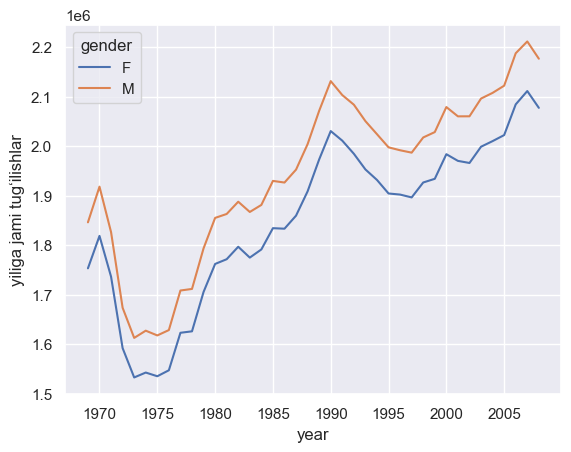

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  # Seaborn uslublarini qo‘llash
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('yiliga jami tug‘ilishlar')

In [92]:
# Further data exploration

In [93]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])


In [94]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')


In [95]:
births['day'] = births['day'].astype(int)


In [96]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek


C:\Users\Asus\AppData\Local\Temp\ipykernel_14532\2666802744.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


Text(0, 0.5, 'mean births by day')

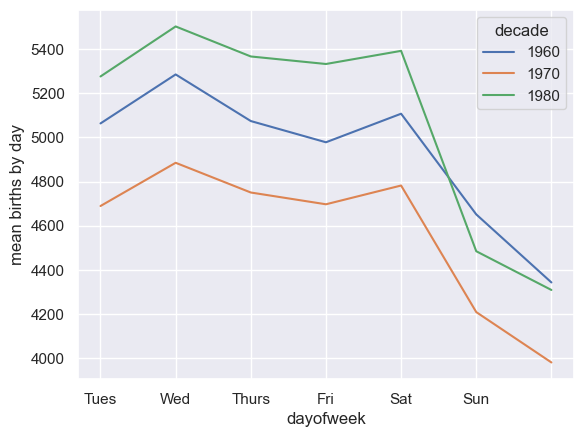

In [97]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')


In [98]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()


births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [99]:
# births_by_date.index = [pd.datatime(2012, month, day)
#                         for (month, day) in births_by_date.index]
# births_by_date.head()


<Axes: >

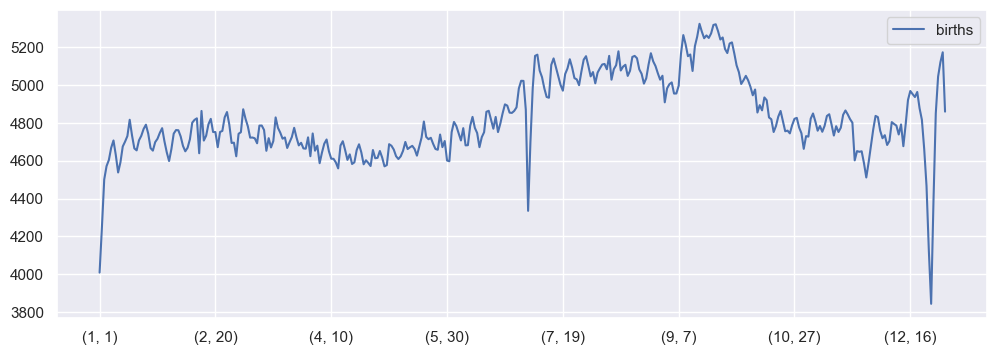

In [100]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)


In [101]:
"""                                       Example                                           """

'                                       Example                                           '

In [102]:
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [103]:
titanic.pivot_table("survived", columns= "class", index = "sex", aggfunc= (np.mean))

C:\Users\Asus\AppData\Local\Temp\ipykernel_14532\3404137845.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table("survived", columns= "class", index = "sex", aggfunc= (np.mean))
C:\Users\Asus\AppData\Local\Temp\ipykernel_14532\3404137845.py:1: FutureWarning: The provided callable <function mean at 0x000001C57131B100> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  titanic.pivot_table("survived", columns= "class", index = "sex", aggfunc= (np.mean))


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [104]:
age = pd.cut(titanic["age"], [0, 18, 80])
titanic.pivot_table("survived", columns= "class", index= ["sex", age])

C:\Users\Asus\AppData\Local\Temp\ipykernel_14532\3821318945.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table("survived", columns= "class", index= ["sex", age])


class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [105]:
titanic.pivot_table(columns= "class", index= "sex", 
                    aggfunc= {"fare": np.mean, 
                              "survived": np.sum})

C:\Users\Asus\AppData\Local\Temp\ipykernel_14532\1047206051.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table(columns= "class", index= "sex",
C:\Users\Asus\AppData\Local\Temp\ipykernel_14532\1047206051.py:1: FutureWarning: The provided callable <function mean at 0x000001C57131B100> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  titanic.pivot_table(columns= "class", index= "sex",
C:\Users\Asus\AppData\Local\Temp\ipykernel_14532\1047206051.py:1: FutureWarning: The provided callable <function sum at 0x000001C571319D00> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" inst

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [106]:
titanic.pivot_table("survived", columns= "class", index = "sex", margins= True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_14532\1622799469.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table("survived", columns= "class", index = "sex", margins= True)


class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [107]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [108]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table("births", index= "decade", columns= "gender", aggfunc= "sum")



gender,F,M
decade,,
1960,1752836,1845742
1970,16260348,17118785
1980,16336507,17171290


In [109]:
births

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5


In [110]:
yaer_bin = pd.cut(births["year"],  bins= range(1960, 2021, 10))
births.pivot_table(columns= "gender", index= "year", values= "month")

gender,F,M
year,,
1969,6.526027,6.526027
1970,6.526027,6.526027
1971,6.526027,6.526027
1972,6.513661,6.513661
1973,6.526027,6.526027
1974,6.526027,6.526027
1975,6.526027,6.526027
1976,6.513661,6.513661
1977,6.526027,6.526027


In [111]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic.pivot_table(columns= "class", index = "sex", values= "fare", 
                    aggfunc=(min, max, np.average))

C:\Users\Asus\AppData\Local\Temp\ipykernel_14532\432113883.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table(columns= "class", index = "sex", values= "fare", aggfunc=(min, max, np.average))
C:\Users\Asus\AppData\Local\Temp\ipykernel_14532\432113883.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  titanic.pivot_table(columns= "class", index = "sex", values= "fare", aggfunc=(min, max, np.average))
C:\Users\Asus\AppData\Local\Temp\ipykernel_14532\432113883.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be 

average                             max                    min  \
class        First     Second      Third     First Second  Third    First   
sex                                                                         
female  106.125798  21.970121  16.118810  512.3292   65.0  69.55  25.9292   
male     67.226127  19.741782  12.661633  512.3292   73.5  69.55   0.0000   

                     
class  Second Third  
sex                  
female   10.5  6.75  
male      0.0  0.00